PCA + Logistic Regression
                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.46      0.48        13
     Colin Powell       0.81      0.83      0.82        60
  Donald Rumsfeld       0.65      0.63      0.64        27
    George W Bush       0.86      0.91      0.89       146
Gerhard Schroeder       0.70      0.64      0.67        25
      Hugo Chavez       0.73      0.53      0.62        15
       Tony Blair       0.85      0.81      0.83        36

         accuracy                           0.80       322
        macro avg       0.73      0.69      0.71       322
     weighted avg       0.80      0.80      0.80       322

LDA + Logistic Regression
                   precision    recall  f1-score   support

     Ariel Sharon       0.58      0.54      0.56        13
     Colin Powell       0.71      0.73      0.72        60
  Donald Rumsfeld       0.52      0.59      0.55        27
    George W Bush       0.86      0.81      0.83       146


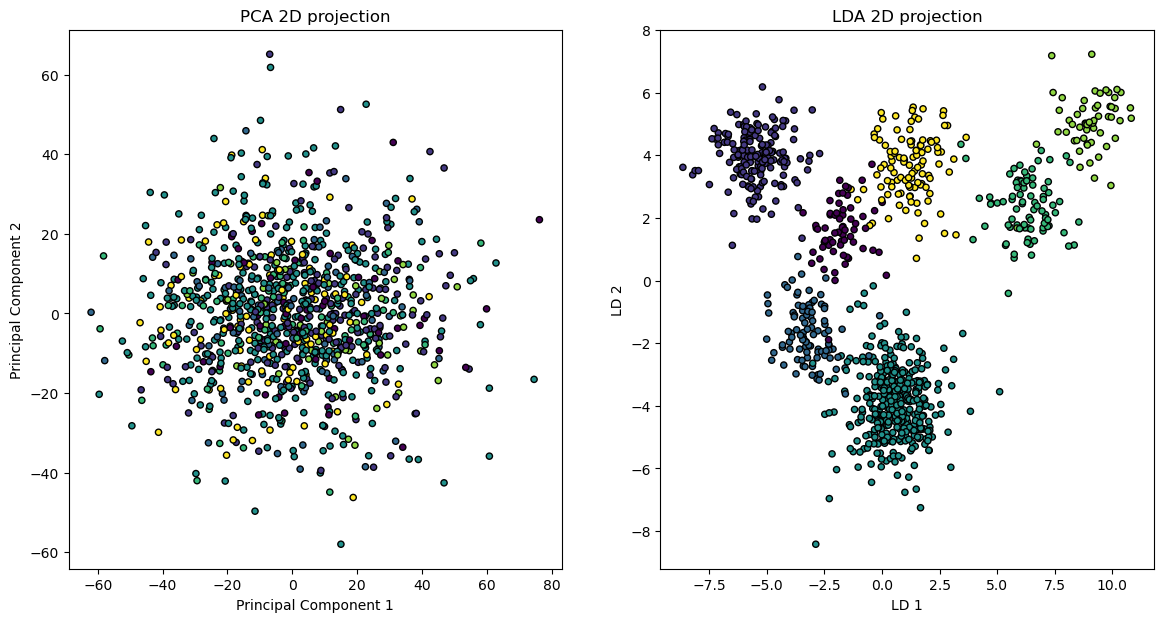

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)
# Load the Olivetti faces dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize PCA
pca = PCA(n_components=150, whiten=True)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# Initialize LDA
lda = LDA(n_components=n_classes - 1)  # n_components should be less than number of classes - 1

# Fit and transform the training data
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
# Logistic Regression with PCA
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_pca, y_train)
y_pred_pca = log_reg.predict(X_test_pca)
print("PCA + Logistic Regression")
print(classification_report(y_test, y_pred_pca, target_names=target_names))

# Logistic Regression with LDA
log_reg.fit(X_train_lda, y_train)
y_pred_lda = log_reg.predict(X_test_lda)
print("LDA + Logistic Regression")
print(classification_report(y_test, y_pred_lda, target_names=target_names))
# PCA 2D projection
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train)
X_test_pca_2d = pca_2d.transform(X_test)

# LDA 2D projection
lda_2d = LDA(n_components=2)
X_train_lda_2d = lda_2d.fit_transform(X_train, y_train)
X_test_lda_2d = lda_2d.transform(X_test)

# Plotting
plt.figure(figsize=(14, 7))

# PCA plot
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, edgecolor='k', s=20)
plt.title('PCA 2D projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# LDA plot
plt.subplot(1, 2, 2)
plt.scatter(X_train_lda_2d[:, 0], X_train_lda_2d[:, 1], c=y_train, edgecolor='k', s=20)
plt.title('LDA 2D projection')
plt.xlabel('LD 1')
plt.ylabel('LD 2')

plt.show()


In [ ]:
# Current directory
import os
os.chdir('E:\work\mine')

In [9]:
import numpy as np         # 提供大量的数学函数库
from numpy import loadtxt   
import pandas as pd         # 提供处理数据的工具

X_new = pd.read_csv(r"extract\All_feature\mRMR\TPC_AAC_PAAC_APAAC\mRMR_TAPA_500.csv", index_col=None, header=None)
y_new = loadtxt(r'extract\label.csv', delimiter=',')    # 加载数据

print(X_new.shape)
print(y_new.shape)
print(np.count_nonzero(y_new==0))   # 等于0的元素的数量
print(np.count_nonzero(y_new==1))   # 等于1的元素的数量

X_new = np.array(X_new)
y_new = np.array(y_new)

(971, 500)
(971,)
446
525


In [ ]:
# dataset splitting
from sklearn.model_selection import train_test_split
X_train_whole, X_ind_test, y_train_whole, y_ind_test =  train_test_split( X_new, y_new, test_size=0.2, random_state=1111)

print(X_train_whole.shape)
print(X_ind_test.shape)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold

y_train_whole = y_train_whole.ravel()

lr = LogisticRegression(max_iter=5000)
svm = SVC(probability=True, random_state=1111)
et = ExtraTreesClassifier(random_state=1111)

voting_model = VotingClassifier(estimators=[('lr',lr), ('svm',svm), ('et',et)], voting='soft')
param_grid = {
    'lr__C': np.logspace(-3, 3, num=100),
    'svm__C': [2 ** exp for exp in range(-4, 5)],
    'et__n_estimators': (1, 500, 5)
}

grid_search = GridSearchCV(estimator=voting_model, param_grid=param_grid, cv=StratifiedKFold(n_splits=10), scoring='accuracy')
grid_search.fit(X_train_whole,y_train_whole)

# 输出最佳参数组合和最佳准确率
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 10折交叉验证测试
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd
X_train_whole, X_ind_test, y_train_whole, y_ind_test =  train_test_split( X_new, y_new, test_size=0.2, random_state=1111)
BACC_collection = []
ACC_collection = []
Sn_collection = []
Sp_collection = []
MCC_collection = []
AUC_collection = []

def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)

# 初始化三个基本模型：SVM、KNN和ExtraTrees
svm_model = SVC(C = 16, degree = 3, kernel = 'poly', tol=1e-05, probability=True, random_state=1111)
lr_model = LogisticRegression(C = 756.463327554629, max_iter=5000)

voting_model = VotingClassifier(estimators=[('lr', lr_model), ('svm', svm_model)], voting='soft')
skf = StratifiedKFold(n_splits=10)
for train, test in skf.split(X_train_whole, y_train_whole):
    X_train, X_valid, y_train, y_valid = X_train_whole[train], X_train_whole[test], y_train_whole[train], y_train_whole[test]
    voting_model.fit(X_train, y_train)
    y_pred_proba = voting_model.predict_proba(X_valid) 
    y_valid_pred = categorical_probas_to_classes(y_pred_proba)
    TP, FP, FN, TN = confusion_matrix(y_valid, y_valid_pred).ravel()
    Sn_collection.append(TP / (TP + FN))
    Sp_collection.append(TN / (TN + FP))
    MCC = (TP*TN-FP*FN)/np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    MCC_collection.append(MCC)
    ACC_collection.append((TP + TN) / (TP + TN + FP + FN))
    BACC_collection.append(0.5 * (TP / (TP + FN)) + 0.5 * (TN / (TN + FP)))
    auc = roc_auc_score(y_valid, y_pred_proba[:, 1])
    AUC_collection.append(auc)

# 输出结果
print(round(np.mean(ACC_collection),3), '±', round(np.std(ACC_collection),3))
print(round(np.mean(Sn_collection),3), '±', round(np.std(Sn_collection),3))
print(round(np.mean(Sp_collection),3), '±', round(np.std(Sp_collection),3))
print(round(np.mean(MCC_collection),3), '±', round(np.std(MCC_collection),3))
print(round(np.mean(AUC_collection),3), '±', round(np.std(AUC_collection),3))



In [ ]:
# Independence test
import statistics
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, roc_auc_score
import numpy as np
import math

# result collection list
BACC_collecton = []
AAC_collection = []
Sn_collecton = []
Sp_collecton = []
MCC_collecton = []
AUC_collecton = []

def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)
svm_model = SVC(C = 1, probability=True, random_state=42)
lr_model = LogisticRegression(C = 0.021544346900318846)

# 构建VotingClassifier
voting_model = VotingClassifier(estimators=[('lr', lr_model), ('svm', svm_model)], voting='soft')
for i in range(10):
    # dataset splitting
    X_train_whole, X_ind_test, y_train_whole, y_ind_test = train_test_split(X_new, y_new, test_size=0.2, random_state=i)
    clf = voting_model.fit(X_train_whole, y_train_whole)
    
    # 获得预测得分
    y_pred_score = clf.predict_proba(X_ind_test)
    y_pred = categorical_probas_to_classes(y_pred_score)    # predict results
    y_true = y_ind_test                 # asign values for confusiong matrix calculation
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred).ravel() # shape [ [True-Positive, False-positive], [False-negative, True-negative] ]
    Sn_collecton.append(TP/(TP+FN))
    AAC_collection.append((TP+TN)/(TP+TN+FP+FN))
    Sp_collecton.append(TN/(TN+FP))
    MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)
    MCC_collecton.append(MCC)
    BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))
    auc = roc_auc_score(y_true, y_pred_score[:, 1])
    AUC_collecton.append(auc)
 
print(round(statistics.mean(AAC_collection),3),'±',round(statistics.stdev(AAC_collection),3))
print(round(statistics.mean(Sn_collecton),3),'±',round(statistics.stdev(Sn_collecton),3))
print(round(statistics.mean(Sp_collecton),3),'±',round(statistics.stdev(Sp_collecton),3))
print(round(statistics.mean(MCC_collecton),3),'±',round(statistics.stdev(MCC_collecton),3))
print(round(statistics.mean(AUC_collecton),3),'±',round(statistics.stdev(AUC_collecton),3))
